Практична робота №4 Авдєєва Серафима ФІТ 4-4

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
import seaborn as sns

In [2]:
# 1.	Завантажте файл Housing.csv. Виведіть перші 5 рядків.
# ------------------------------------------------------------------------------------
data0 = pd.read_csv("E:/University/виконані завдання/МН виконані/Housing.csv", encoding='unicode_escape')
data_h5 = data0.head(5)
print(data_h5)

      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  


In [3]:
# 2.	Зробіть новий датасет, який містить тільки ці стовпчики.
# columns = ['price', 'area', 'bedrooms', 'bathrooms']
# ----------------------------------------------------------------------------------------
selected_cols = ['price', 'area', 'bedrooms', 'bathrooms']
data = data0[selected_cols]
print(data.head(5))

      price  area  bedrooms  bathrooms
0  13300000  7420         4          2
1  12250000  8960         4          4
2  12250000  9960         3          2
3  12215000  7500         4          2
4  11410000  7420         4          1


In [4]:
# 3.	Проведіть попередній аналіз даних: вивчіть структуру даних,
# перевірте наявність відсутніх значень та інші особливості даних.
# ----------------------------------------------------------------------------------------
# визначаємо тип даних: 
print("Типи даних: ")
print(data.dtypes)
# Перевіряємо наявність відсутніх значень:
nulls = data.isnull().sum()
print("\nКількість відсутніх значень у кожному стовпці:")
print(nulls)
# Заміняємо “-“ на Nan:
data = data.replace("—", np.nan)
# Змінюємо тип даних на float:
data = data.astype(float)
# Заміняємо Nan на середнє значення за стовпцем:
for column in data.columns:
    try:
        data[column] = data[column].fillna(data[column].mean())
    except:
        pass
print("\nТипи даних: ")
print(data.dtypes)

Типи даних: 
price        int64
area         int64
bedrooms     int64
bathrooms    int64
dtype: object

Кількість відсутніх значень у кожному стовпці:
price        0
area         0
bedrooms     0
bathrooms    0
dtype: int64

Типи даних: 
price        float64
area         float64
bedrooms     float64
bathrooms    float64
dtype: object


In [5]:
#4 Нормалізуйте дані перед подальшим використанням.
# ----------------------------------------------------------------------------------------

# Створення об'єкта StandardScaler
scaler = StandardScaler()
# Нормалізація даних
normal_data = scaler.fit_transform(data)
# Перетворення даних назад у DataFrame
normal_df = pd.DataFrame(normal_data, columns=['price', 'area', 'bedrooms', 'bathrooms'])
print(normal_df.head(5))

      price      area  bedrooms  bathrooms
0  4.566365  1.046726  1.403419   1.421812
1  4.004484  1.757010  1.403419   5.405809
2  4.004484  2.218232  0.047278   1.421812
3  3.985755  1.083624  1.403419   1.421812
4  3.554979  1.046726  1.403419  -0.570187


In [6]:
# 5.	Розділіть дані на навчальний та тестовий набори
# 6.	Підготуйте дані: виберіть атрибути (площа, кількість ванних кімнат,
# кількість спалень) та цільову змінну (ціну на будинок).
# ---------------------------------------------------------------------------------------
X = normal_df[['area', 'bedrooms', 'bathrooms']]
Y = normal_df['price']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [7]:
# 7.	Побудуйте модель лінійної регресії та навчіть її на навчальних даних.
# ----------------------------------------------------------------------------------------
model = LinearRegression()
model.fit(X_train, Y_train)
print(f"coef {model.coef_}")
print(f"intercept {model.intercept_}")

coef [0.40082084 0.14213176 0.38208794]
intercept -0.016281754425403194


In [8]:
#  8. Оцініть якість моделі на тестових даних, використовуючи показники,
# такі як середньоквадратична помилка (RMSE) та коефіцієнт детермінації (R^2). 
# Потім застосуйте крос-валідацію для підвищення якості моделі.
# Порівняйте результати (без крос-валідації і з крос-валідацією).
# ---------------------------------------------------------------------------------------
# Передбачення на тестових даних
Y_pred = model.predict(X_test)
# RMSE
rmse = np.sqrt(mean_squared_error(Y_test, Y_pred))
print(f'Середньоквадр. помилка (RMSE): {rmse}')
# R^2
r2 = r2_score(Y_test, Y_pred)
print(f'Коефіцієнт детермінації (R^2): {r2}')
# Крос-валідація
cv_scores = cross_val_score(model, X, Y, cv=5)
mean_r2_cv = np.mean(cv_scores)
print(f'Середній R^2 після крос-валідації: {mean_r2_cv}')

if r2 > mean_r2_cv:
    print('Модель без крос-валідації має кращий R^2 на тестовому наборі.')
elif r2_without_cv < mean_r2_cv:
    print('Модель з крос-валідацією має кращий середній R^2.')
else:
    print('Результати R^2 без крос-валідації та з крос-валідацією суттєво не відрізняються.')

Середньоквадр. помилка (RMSE): 0.8874106823867896
Коефіцієнт детермінації (R^2): 0.45592991188724463
Середній R^2 після крос-валідації: -13.98915818011169
Модель без крос-валідації має кращий R^2 на тестовому наборі.


In [9]:
# 9.	Виконайте аналіз результатів та виведіть прогнозовані ціни
# на будинки для тестового набору даних.
predicted_prices = scaler.inverse_transform(np.concatenate([Y_pred.reshape(-1, 1), X_test], axis=1))
predicted_prices = pd.DataFrame(predicted_prices, columns=['predicted_price', 'area', 'bedrooms', 'bathrooms'])
print(predicted_prices.head(10))

   predicted_price    area  bedrooms  bathrooms
0     6.383168e+06  5900.0       4.0        2.0
1     6.230250e+06  6500.0       3.0        2.0
2     3.597885e+06  4040.0       2.0        1.0
3     4.289731e+06  5000.0       3.0        1.0
4     3.930446e+06  3960.0       3.0        1.0
5     4.883933e+06  6720.0       3.0        1.0
6     5.505773e+06  8520.0       3.0        1.0
7     6.068793e+06  4990.0       4.0        2.0
8     3.321512e+06  3240.0       2.0        1.0
9     3.495158e+06  2700.0       3.0        1.0


In [10]:
# Визначте аналітично коефіцієнти лінійної регресії (ваги моделі) 
# для цієї задачі, використовуючи формулу для спрощеного аналітичного
# рішення лінійної регресії.
#------------------------------------------------------------------------------------------------
# Додавання стовпця з одиницями до матриці ознак для врахування зсуву
X_intercept = np.hstack([np.ones((X_train.shape[0], 1)), X_train])
# Знаходження аналітичного рішення
an_coefs = np.linalg.inv(X_intercept.T @ X_intercept) @ X_intercept.T @ Y_train
print('Аналітичні коефіцієнти (ваги моделі):')
print(an_coefs)

Аналітичні коефіцієнти (ваги моделі):
[-0.01628175  0.40082084  0.14213176  0.38208794]


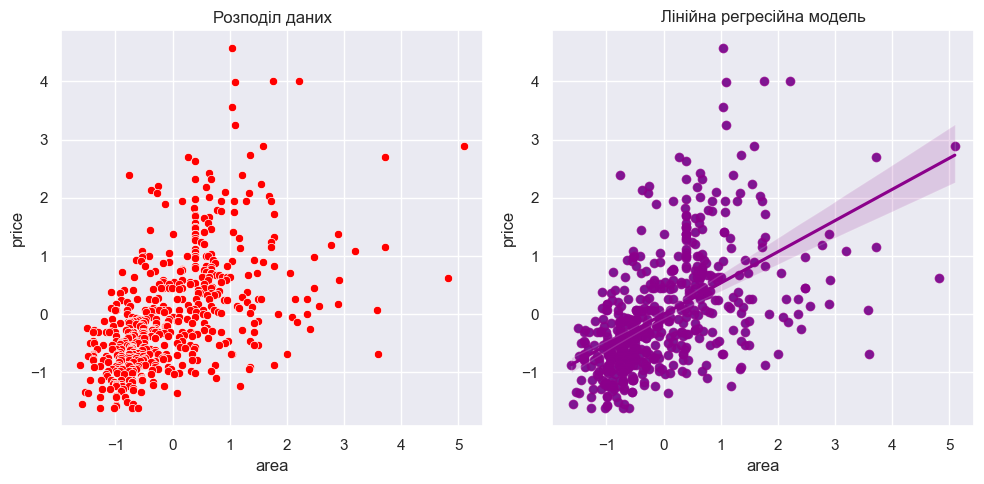

In [11]:
# Візуалізуйте дані та результати регресії: побудуйте графіки для 
# ознайомлення з розподілом даних і лінійною регресійною моделлю
#-------------------------------------------------------------------------------------------------

sns.set(style="darkgrid")
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
sns.scatterplot(x='area', y='price', data=normal_df, color="red")
plt.title('Розподіл даних')

plt.subplot(1, 2, 2)
sns.scatterplot(x='area', y='price', data=normal_df)
sns.regplot(x='area', y='price', data=normal_df, color='darkmagenta')
plt.title('Лінійна регресійна модель')

plt.tight_layout()
plt.show()


In [12]:
# Порівняйте отримані параметри (коефіцієнти) лінійної регресії 
# з аналітичними результатами та оцініть, наскільки схожі вони.
# -----------------------------------------------------------------------------------------------
print('Аналітичні результати: ', an_coefs)
print('Параметри лінійної регресії: ', model.coef_)

Аналітичні результати:  [-0.01628175  0.40082084  0.14213176  0.38208794]
Параметри лінійної регресії:  [0.40082084 0.14213176 0.38208794]


Отримані параметри лінійної регресії й аналітичні результати подібні, отже, можемо зробити висновок, що лінійна регресія є досатньо ефективним методом прогнозування цін на будинки на основі вказаних атрибутів.

__Висновок__

Під час виконання практичної роботи, спрямованої на прогноз цін на будинки на основі різних атрибутів за допомогою лінійної регресії, було здійснено наступні кроки:

Підготовка даних: Спочатку було завантажено вихідні дані з файлу та проведено підготовку до подальшого аналізу. Цей процес включав у себе відбір потрібних атрибутів (площа, кількість ванних кімнат, кількість спалень) та визначення цільової змінної (ціни на будинок).

Аналіз даних: Було детально досліджено структуру даних та проведено аналіз наявності пропущених значень та інших особливостей. Дані були оброблені та нормалізовані для підвищення стійкості моделі.

Побудова моделі лінійної регресії: На наступному етапі була створена лінійна регресійна модель, яка була навчена на навчальних даних для прогнозу цін на будинки на підставі зазначених атрибутів.

Оцінка якості моделі: Для оцінки ефективності моделі були використані метрики, такі як середньоквадратична помилка (RMSE) та коефіцієнт детермінації (R^2), що дозволило визначити, наскільки точно модель прогнозує ціни на будинки.

Крос-валідація: Для покращення надійності моделі була застосована крос-валідація, що дозволила отримати більш об'єктивну оцінку її ефективності.

Порівняння з аналітичним рішенням: Значення коефіцієнтів лінійної регресії, отримані за допомогою аналітичних розрахунків та із використанням бібліотеки для машинного навчання, були порівняні для перевірки правильності моделювання.

Дослідження показало, що лінійна регресія є ефективним методом для прогнозу цін на будинки на основі зазначених атрибутів, за умови наявності лінійної залежності між ними. Модель може бути корисною для розуміння впливу окремих атрибутів на ціни на нерухомість та для прогнозування цін у майбутньому.